In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('fods_1.csv')
print(len(df))

546


In [3]:
df.head()

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979


In [4]:
df = df.sample(frac=1)
reg_wt=[]

In [5]:
def init():
    global df
    length = (df.shape[0] * 1)
    length = int(length)
    X_train=(np.array(df.iloc[0:length,0:2]))
    Y_train = (np.array(df.iloc[0:length,[2]]))
    X_train = X_train.T
    Y_train = Y_train.T
    return X_train,Y_train

In [6]:
X_train,Y_train=init()

In [7]:
def grad_desc(X,Y,lr=0.01,epoch=1000):
    J = []
    w1 = []
    w2 = []
    w = np.zeros((1,2))
    for i in range (epoch):
        Yhat = np.dot(w,X)
        loss = np.average((Yhat - Y) ** 2) / 2
        J.append(loss)
        w1.append(w[0][0])
        w2.append(w[0][1])
        grad1 = np.average( np.multiply(Yhat-Y,X[0]))
        grad2 = np.average(np.multiply(Yhat-Y,X[1]))
        w[0][0] = w[0][0] - lr*grad1
        w[0][1] = w[0][1] - lr*grad2
    return J,w1,w2

In [8]:
J_1,w11,w12 = grad_desc(X_train,Y_train)

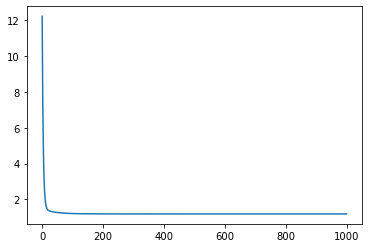

In [9]:
plt.plot(J_1)

In [10]:
J_1[-1]

1.1904401304552479

In [11]:
J1 = np.array(J_1)
J1[999] # OPtimal J value

1.1904401304552479

In [12]:
def cost_func(w1,w2):
    m = X_train.shape[1]
    ans_lst=[]
    for j in range(w1.shape[0]):
        temp=np.average((w1[j]*X_train[0,:]+w2[j]*X_train[1,:]-Y_train[0,:])**2)/2
        ans_lst.append(temp)
    return np.array(ans_lst).reshape(len(ans_lst),1)

In [13]:
w11 = np.array(w11).reshape(len(w11),1)
w12 = np.array(w12).reshape(len(w12),1)
w12[999]

array([1.32826872])

In [14]:
x = np.arange(-2,2,0.005)
y = np.arange(-2,2,0.005)
X, Y = np.meshgrid(x, y)
print(X.shape)
print(Y.shape)

Z = cost_func(X.flatten(), Y.flatten()).reshape(X.shape[0],X.shape[1])
#X.flatten().shape
Y_train.shape

(800, 800)
(800, 800)


(1, 546)

In [15]:
print(w11[999])

[0.48403657]


In [16]:
print(w12[999])

[1.32826872]


In [17]:
def in_range(eeta,q,delta=0.005):
    points1 = []
    points2 = []
    for i in range(len(w11)):
        if abs(w11[len(w11)-i-1])**q+abs(w12[len(w11)-i-1])**q <= eeta+delta and abs(w11[len(w11)-i-1])**q+abs(w12[len(w11)-i-1])**q >= eeta-delta:
            points1.append(w11[len(w11)-i-1])
            points2.append(w12[len(w11)-i-1])
    return points1,points2

In [18]:
def MSE(w1,w2):
    temp=np.average(((w1*X_train[0,:]+w2*X_train[1,:]-Y_train))**2)
    return temp

(array([0.48403657]), array([1.32826872]))

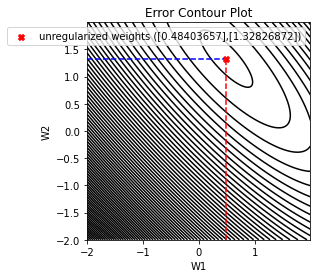

In [19]:
temp1=np.arange(-2,w11[999],0.05)
temp2=np.arange(-2,w12[999],0.05)
plt.figure(figsize=(4,4))
plt.contour(X, Y, Z, colors='black',levels=100)
plt.title("Error Contour Plot")
plt.xlabel("W1")
plt.ylabel("W2")
plt.plot(temp1,np.ones(len(temp1))*w12[999],"-b",linestyle="dashed")
plt.plot(np.ones(len(temp2))*w11[999],temp2,"-r",linestyle="dashed")
plt.scatter(w11[999],w12[999],color='red',marker='X',label=f'unregularized weights ({w11[999]},{w12[999]})')
plt.legend()
w11[999],w12[999]

3.269231375679024


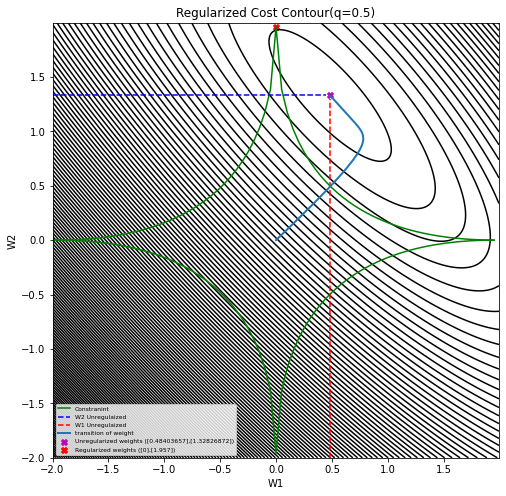

In [20]:
plt.figure(figsize=(8,8))
plt.contour(X, Y, Z, colors='black',levels=150)
plt.title("Regularized Cost Contour(q=0.5)")
plt.xlabel("W1")
plt.ylabel("W2")
l1 = np.arange(-2,2,0.05)
l2 = (1.4 - (abs(l1) ** 0.5))**2
plt.plot(l1,l2,'g',label='Constranint')
l1 = np.arange(-2,2,0.05)
l2 = -1 * ((1.4 - (abs(l1) ** 0.5))**2)
plt.plot(l1,l2,'g')
temp1=np.arange(-2,w11[999],0.05)
temp2=np.arange(-2,w12[999],0.05)
plt.plot(temp1,np.ones(len(temp1))*w12[999],"-b",linestyle="dashed",label="W2 Unregulaized")
plt.plot(np.ones(len(temp2))*w11[999],temp2,"-r",linestyle="dashed",label="W1 Unregulaized")
plt.plot(w11,w12,linewidth=2,label='transition of weight')
plt.scatter([w11[999]],[w12[999]],color='m',marker='X',label=f'Unregularized weights ({w11[999]},{w12[999]})')
plt.scatter([0],[1.957],color='#FF0000',marker='X',label=f'Regularized weights ([0],[1.957])')
plt.legend(loc='lower left',prop={'size': 6})
reg_wt.append([0,1.957])
print(MSE(0,1.957))

22.087034100970698


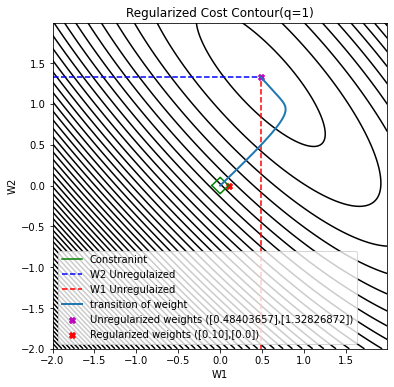

In [21]:
plt.figure(figsize=(6,6))
plt.contour(X, Y, Z, colors='black',levels=70)
plt.title("Regularized Cost Contour(q=1)")
plt.xlabel("W1")
plt.ylabel("W2")
l1 = np.arange(-0.1,0.1,0.005)
l2 = 0.1-abs(l1)
plt.plot(l1,l2,'g',label='Constranint')
l1 = np.arange(-0.1,0.1,0.005)
l2 = -1 * (0.1-abs(l1))
plt.plot(l1,l2,'g')
temp1=np.arange(-2,w11[999],0.05)
temp2=np.arange(-2,w12[999],0.05)
plt.plot(temp1,np.ones(len(temp1))*w12[999],"-b",linestyle="dashed",label="W2 Unregulaized")
plt.plot(np.ones(len(temp2))*w11[999],temp2,"-r",linestyle="dashed",label="W1 Unregulaized")
plt.plot(w11,w12,linewidth=2,label='transition of weight')
plt.scatter([w11[999]],[w12[999]],color='m',marker='X',label=f'Unregularized weights ({w11[999]},{w12[999]})')
plt.scatter([0.10],[0],color='#FF0000',marker='X',label=f'Regularized weights ([0.10],[0.0])')
plt.legend(loc='lower left')
reg_wt.append([0.1,0])
print(MSE(0.1,0))

[0.12327612] [0.12136742]
18.898199575392223


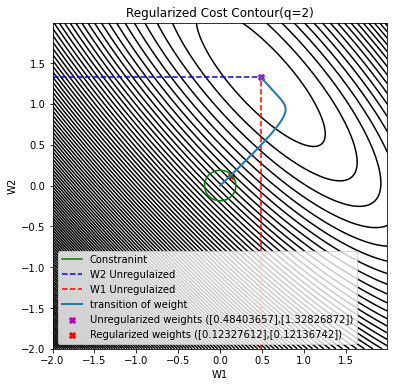

In [22]:
plt.figure(figsize=(6,6))
plt.contour(X, Y, Z, colors='black',levels=120)
plt.title("Regularized Cost Contour(q=2)")
plt.xlabel("W1")
plt.ylabel("W2")
radius=0.035**0.5
l1 = np.arange(-radius,radius,0.0005)
l2 = (0.035-abs(l1)**2)**0.5
plt.plot(l1,l2,'g',label='Constranint')
l1 = np.arange(-radius,radius,0.0005)
l2 = -1 * (0.035-abs(l1)**2)**0.5
plt.plot(l1,l2,'g')
temp1=np.arange(-2,w11[999],0.05)
temp2=np.arange(-2,w12[999],0.05)
plt.plot(temp1,np.ones(len(temp1))*w12[999],"-b",linestyle="dashed",label="W2 Unregulaized")
plt.plot(np.ones(len(temp2))*w11[999],temp2,"-r",linestyle="dashed",label="W1 Unregulaized")
plt.plot(w11,w12,linewidth=2,label='transition of weight')
plt.scatter([w11[999]],[w12[999]],color='m',marker='X',label=f'Unregularized weights ({w11[999]},{w12[999]})')
r,s=in_range(0.035,2,0.01)
plt.scatter([r[0]],[s[0]],color='#FF0000',marker='X',label=f'Regularized weights ({r[0]},{s[0]})')
plt.legend(loc='lower left')
reg_wt.append([r[0],s[0]])
print(r[0],s[0])
print(MSE(r[0],s[0]))

[0.39540987] [0.3979448]
9.417895199105336


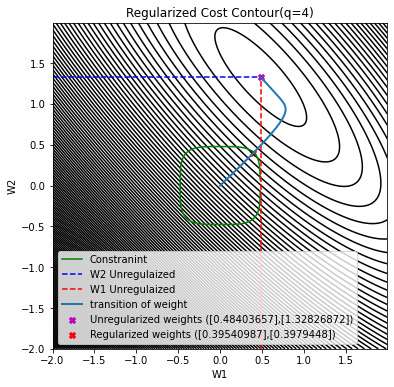

In [23]:
plt.figure(figsize=(6,6))
plt.contour(X, Y, Z, colors='black',levels=150)
plt.title("Regularized Cost Contour(q=4)")
plt.xlabel("W1")
plt.ylabel("W2")
radius=0.052**0.25
l1 = np.arange(-radius,radius,0.005)
l2 = (0.052-abs(l1)**4)**0.25
plt.plot(l1,l2,'g',label='Constranint')
l1 = np.arange(-radius,radius,0.0005)
l2 = -1 * (0.052-abs(l1)**4)**0.25
plt.plot(l1,l2,'g')
temp1=np.arange(-2,w11[999],0.05)
temp2=np.arange(-2,w12[999],0.05)
plt.plot(temp1,np.ones(len(temp1))*w12[999],"-b",linestyle="dashed",label="W2 Unregulaized")
plt.plot(np.ones(len(temp2))*w11[999],temp2,"-r",linestyle="dashed",label="W1 Unregulaized")
plt.plot(w11,w12,linewidth=2,label='transition of weight')
plt.scatter([w11[999]],[w12[999]],color='m',marker='X',label=f'Unregularized weights ({w11[999]},{w12[999]})')
r,s=in_range(0.052,4,0.02)
plt.scatter([r[0]],[s[0]],color='#FF0000',marker='X',label=f'Regularized weights ({r[0]},{s[0]})')
plt.legend(loc='lower left')
reg_wt.append([r[0],s[0]])
print(r[0],s[0])
print(MSE(r[0],s[0]))

In [24]:
#MSE for q=0.5
print(MSE(reg_wt[0][0],reg_wt[0][1]))
#MSE for q=1
print(MSE(reg_wt[1][0],reg_wt[1][1]))
#MSE for q=2
print(MSE(reg_wt[2][0],reg_wt[2][1]))
#MSE for q=4
print(MSE(reg_wt[3][0],reg_wt[3][1]))

3.269231375679024
22.087034100970698
18.898199575392223
9.417895199105336
